In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

Using TensorFlow backend.


In [2]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
#to vectorize the labels: you can cast the label list as an integer tensor or you can use one-hot encoding
# one-hot encoding is a popular format for categorical data, also called categorical encoding

def to_one_hot (labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [56]:
#larger dimensional layers are required to classify the inputs into one of 46 categories without loss of data in the layers
# a 16-dimensional layer might be too limited to learn 46 different classes: such small layers might act as information bottlenecks
#so I'm going to use a 64-dimensional layer

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))#46 dimensional-layer output a 46-dimensional vector for the different output classes

#best solution thus far: one hidden layer

In [57]:
model.compile(optimizer="rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [64]:
history = model.fit(partial_x_train, partial_y_train, validation_data=(x_val, y_val), epochs=15, batch_size=512)

Train on 7982 samples, validate on 1000 samples
Epoch 1/15
7982/7982 [==============================] - 2s 221us/step - loss: 0.2698 - accuracy: 0.9384 - val_loss: 1.0793 - val_accuracy: 0.7890
Epoch 2/15
7982/7982 [==============================] - 2s 215us/step - loss: 0.2310 - accuracy: 0.9463 - val_loss: 1.0952 - val_accuracy: 0.8030
Epoch 3/15
7982/7982 [==============================] - 2s 211us/step - loss: 0.1993 - accuracy: 0.9491 - val_loss: 1.1750 - val_accuracy: 0.7750
Epoch 4/15
7982/7982 [==============================] - 2s 206us/step - loss: 0.1748 - accuracy: 0.9526 - val_loss: 1.1378 - val_accuracy: 0.7880
Epoch 5/15
7982/7982 [==============================] - 2s 208us/step - loss: 0.1611 - accuracy: 0.9564 - val_loss: 1.1415 - val_accuracy: 0.8020
Epoch 6/15
7982/7982 [==============================] - 2s 207us/step - loss: 0.1585 - accuracy: 0.9548 - val_loss: 1.2163 - val_accuracy: 0.7850
Epoch 7/15
7982/7982 [==============================] - 2s 208us/step - loss

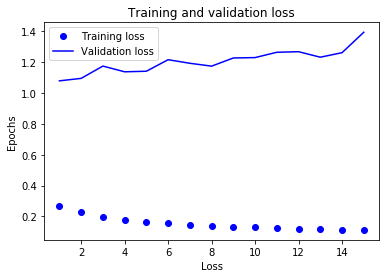

In [65]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()

plt.show()

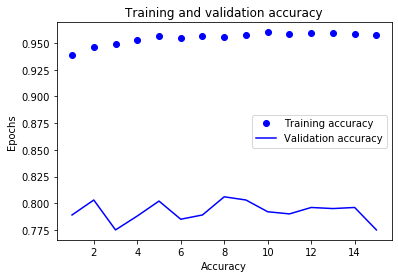

In [66]:
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.legend()

plt.show()

In [69]:
# model.predict(x_test)


model.test_on_batch(x_test, one_hot_test_labels)

[1.612764, 0.75556546]